In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introdução aos fundamentos da engenharia de dados



Chegou o momento de começarmos a construir a arquitetura do nosso pipeline de dados. Vamos projetar as etapas de coleta, ingestão, processamento, armazenamento e disponibilização. Para nos familiarizarmos como os conceitos que serão abordados nesta interação, desenvolveremos uma maquete para estudarmos os conceitos fundamentais da engenharia de dados.

A maquete nos possibilitará implementar um pipeline de dados considerando todas as limitações apresentadas e discutidas durante a fase de Entendimento do Negócio

Nosso projeto de estudo marca o início das etapas de Entendimento dos Dados:

  - Mapeamento dos Sistemas de Origem
  - Conexões com Bancos de Dados (OLTP) e APIs públicos
  - Raspagem de dados abertos
  - Definição da estrutura de ingestão e formato dos dados
  - Avaliação da qualidade dos dados
  - Exploração Inicial dos dados

Iremos construir um fluxo de processamento de dados utilizando um conjunto de dados fictícios de cadastros de usuários do Armazém da Criatividade que nos permitirá aprender como realizar consultas e identificar relacionamentos que sustentarão nossas análises no futuro.

Este estudo também marca nosso primeiro contato com as linguagems SQL e Python. Utilizaremos SQL para realizarmos consultas preliminares e Python para programar a automação do pipeline.



## Conhecendo a origem dos dados



## Contexto

Esse conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos do mercado brasileiro. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Loja Olist e enviá-los diretamente aos clientes usando parceiros de logística da Olist. Veja mais no site: www.olist.com

Depois que um cliente compra o produto na Olist Store, um vendedor é notificado para atender a esse pedido. Uma vez que o cliente recebe o produto, ou a data de entrega estimada é devida, a pessoa cliente recebe uma pesquisa de satisfação por e-mail, onde ele pode dar uma nota para a experiência de compra e escrever alguns comentários.

### Atenção
- Um pedido pode ter vários itens.
- Cada item pode ser preenchido por um vendedor distinto.
- Todos os textos que identificam lojas e parceiros foram substituídos pelos nomes das grandes casas de Game of Thrones.


## Formato e Esquema de Dados

Os dados estão compactados no formato .zip que contém 8 arquivos .csv que representam as tabelas do banco de dados da Olist.

Chamamos a estrutura lógica que define a organização, a disposição e as relações entre os dados armazenados em um banco de dados de "Esquema". Ele serve como um "mapa" ou "modelo" que descreve como os dados são organizados em tabelas, colunas, chaves, índices, e outros elementos.

Para entendermos o esquema de dados da Olist, consulte a figura abaixo:

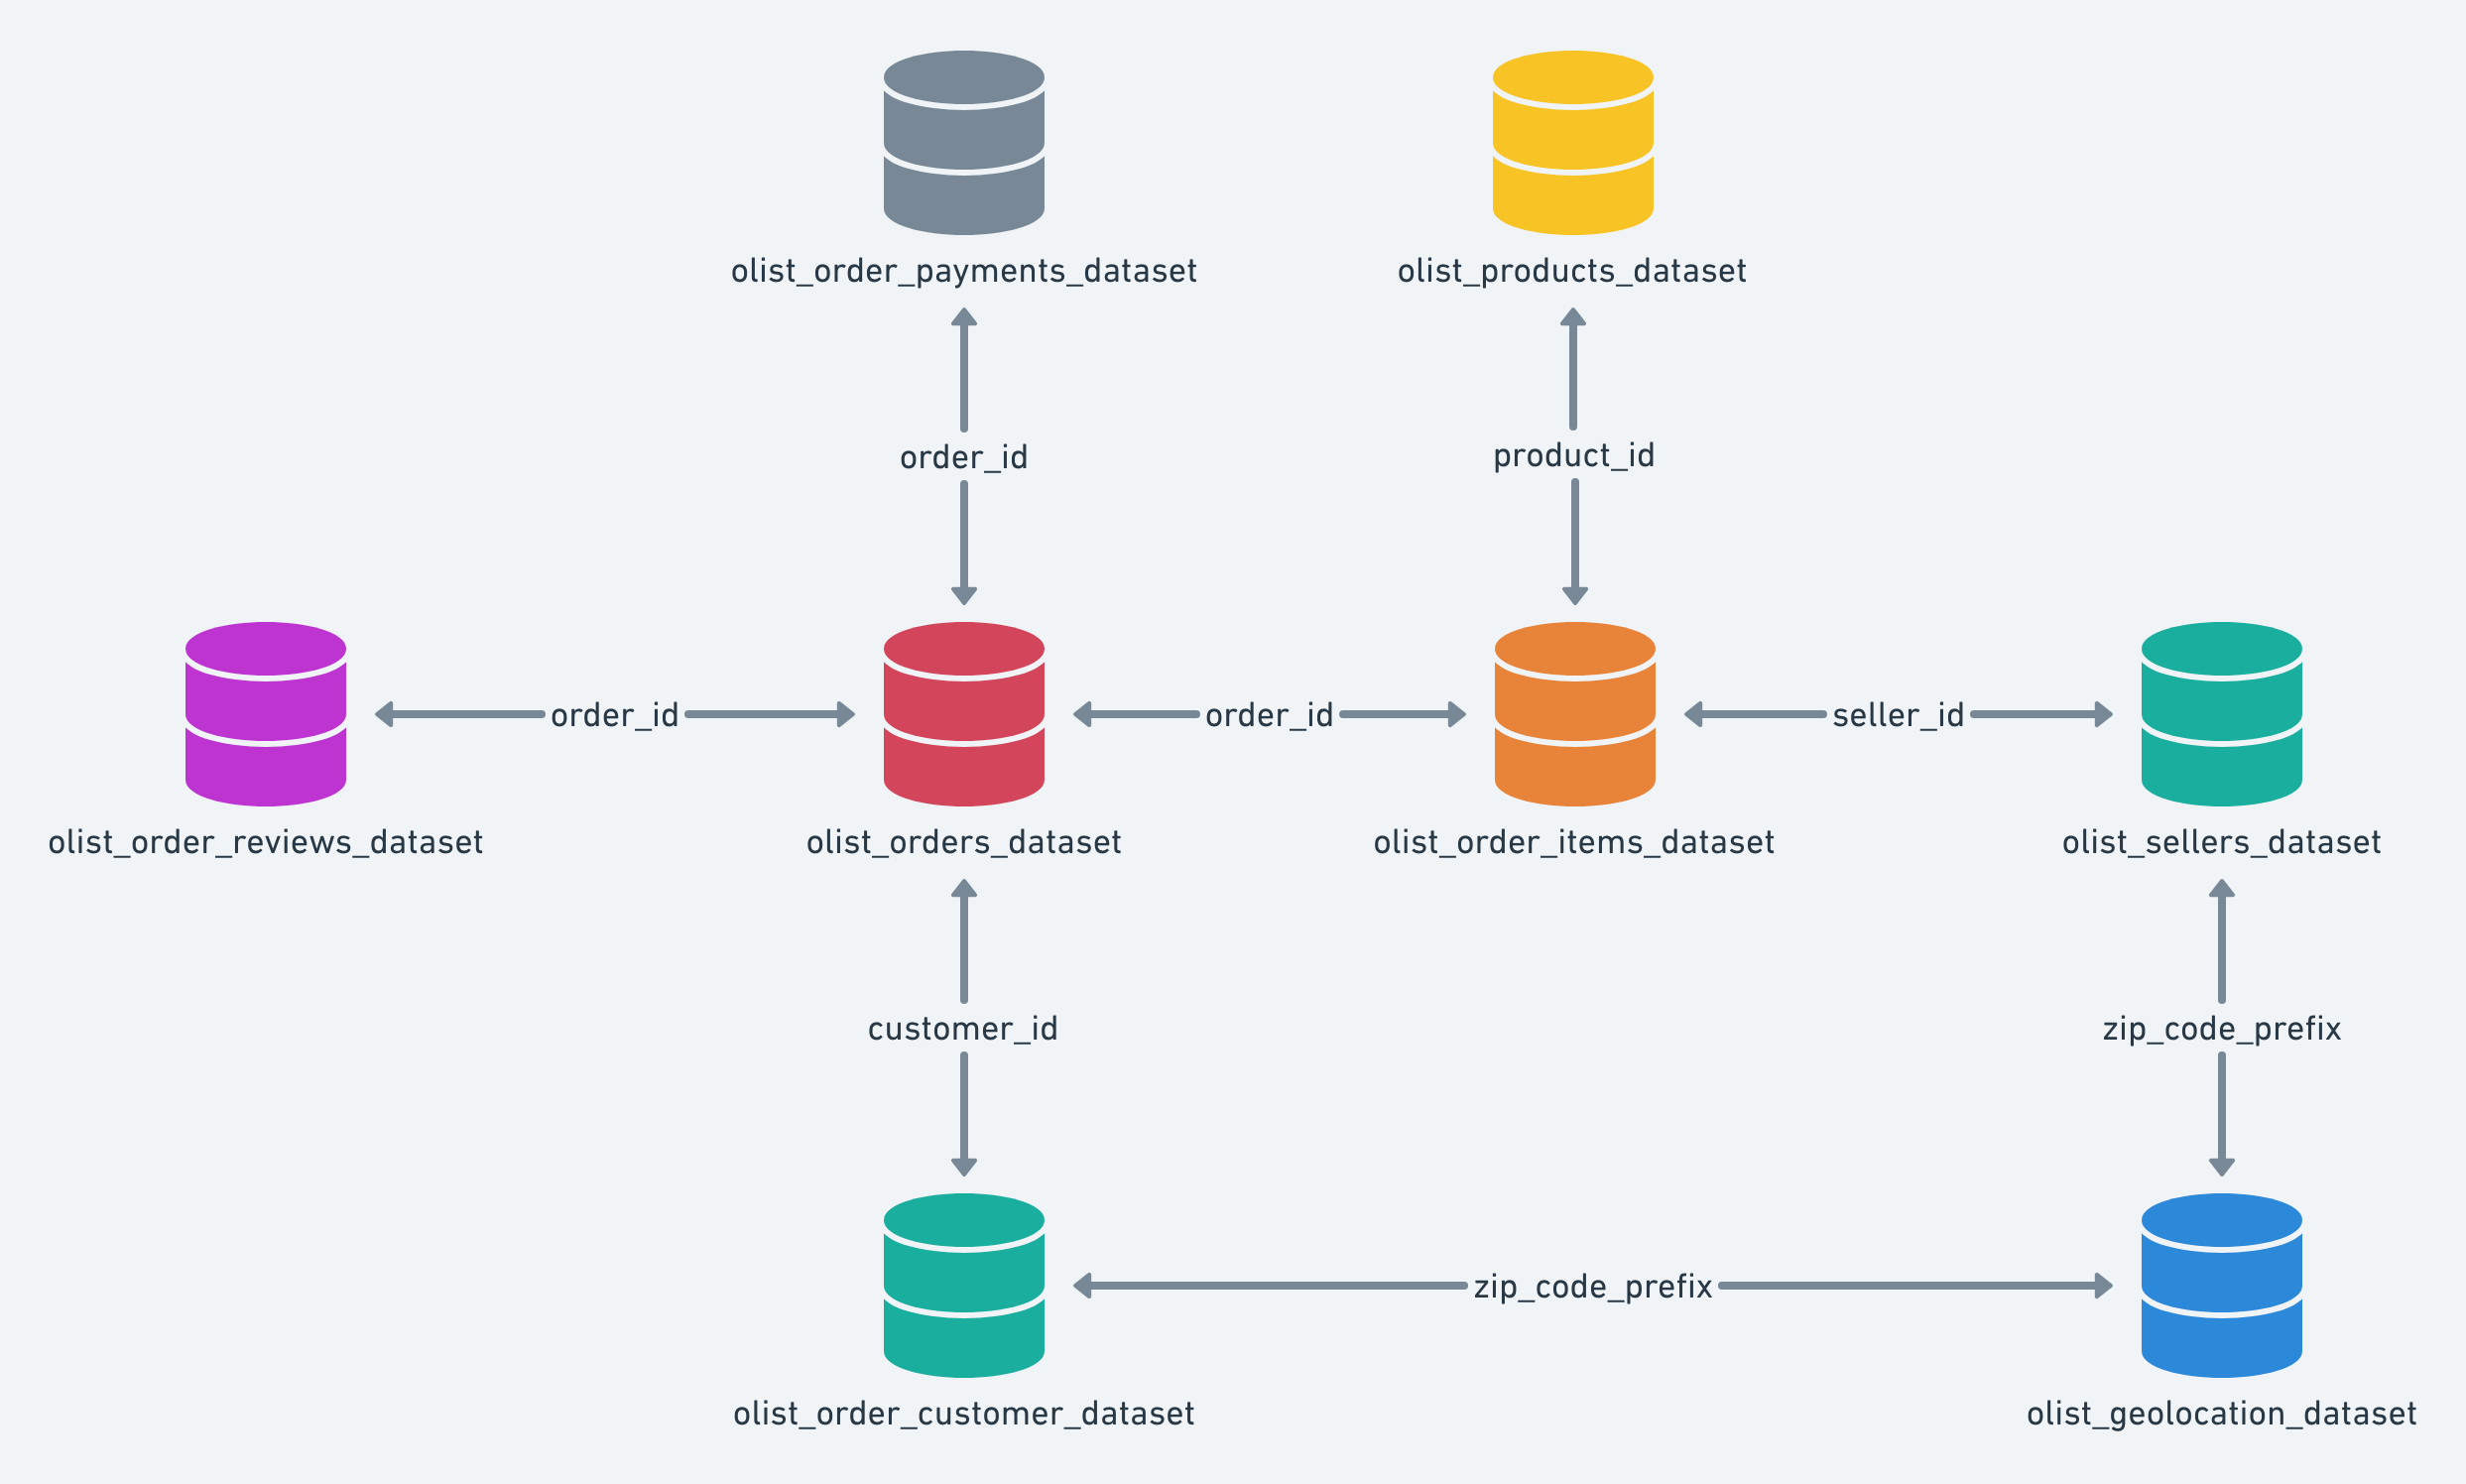

In [ ]:
img_path ="/content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/notebooks/assets/HRhd2Y0.png"
Image(img_path, width=1500)

# Pipeline de Dados

A _ingestão de dados_ é uma das primeiras etapas do pipeline de dados. Os pipelines são a combinação de arquitetura, sistemas e processos que movem dados de um ponto A para um ponto B. A ingestão de dados é a etapa em que os engenheiros de dados começam a projetar ativamentea as atividades do pipeline.

A Engenharia de Dados é uma área intimamente relacionada à Ciência de Dados. São os engenheiros de dados os responsáveis por fornecerem os dados necessários para os analistas e cientistas. A Engenharia de Dados possui seu próprio cliclo de vida, padrões e ferramentas para lidar com a Geração, Armazenamento, Ingestão, Transformação e Disponibilização dos dados, além das tarefas subjacentes como Segurança, Gerenciamento de dados, DataOps, Arquitetura de dados, Orquestração e Engenharia de Software. Embora o ciclo de vida da engenharia de dados esteja fora do nosso escopo, implementaremos um padrão bem estabelecido na área para movimentação e processamento de dados chamado ETL (Extract, Transform and Load) utilizando camadas de processamento e enriquecimento dos dados. Discutiremos estes conceitos a seguir.



## ETL

Exract,Transform and Load (Extração, Transformação e Carga) - ETL - é um padrão de ingestão, armazenamento e transformação fundamental para engenharia de dados. Consiste em um processo sequencial que envolve a coleta de dados de diversas fontes, sua transformação para um formato adequado e a carga desses dados em um sistema de armazenamento final.

Nossa _maquete_ ira simular um ETL básico e tradicional para nos familiarizarmos com os fundamentos. Para isso precisamos de:

1. Um sistema de banco de dados transacional como origem dos dados. Bancos de dados transacionais são projetados para otimizar operações de leitura e escrita rápidas e frequentes, que são típicas em ambientes onde muintas transações (como vendas, compras, trasnferências de dinheiro, reservas, etc) ocorrem simultaneamente.

2. Um processador monolítico, isso é, um sistema de software ou arquitetura que integra todas as funcionalidades de processamento de dados em um único bloco ou aplicação. Ou seja, em uma abordagem monolítica, todas as operações de ETL — como leitura de dados, transformação, limpeza, e carregamento — são realizadas por um único sistema ou aplicação

3. Um armazenamento de objetos. Após a extração dos dados, existe a opção de realizarmos a transformação dos dados antes de inserí-los em um destino de armazenamento, ou carregá-los diretamente para trasnformação posterior (ELT).

## Abstrações de armazenamento de dados

_Abstrações de armazenamento na engenharia de dados_ são padrões de organização e consulta de dados construidas sobre os sistemas de armazenamento. Um padrão amplamente utilizado na engenharia de dados é a **Arquitetura de Camadas de Data Lake** ou **Arquitetura de Camadas de Refinamento de Dados**. Essa arquitetura organiza os dados em diferentes camadas de processamento e armazenamento, onde cada camada representa um nível de refinamento e preparação dos dados para seu uso final. A principal vantagem dessa abordagem é a separação de responsabilidades, que facilita a manutenção, a escalabilidade e a evolução do sistema.

No contexto da engenharia de dados, cada camada abstrai o nível de processamento e limpeza dos dados em relação à camada anterior. As camadas são divididas por estágios de refinamento como: Camada raw (dados brutos), Bronze (dados organizados), Silver (dados refinados) e Gold (dados prontos para consumo).

A organização dos dados em camadas permite que diferentes equipes ou processos trabalhem em níveis distintos de granularidade, sem necessidade de compreender todos os detalhes das camadas anteriores.


### Arquitetura do nosso experimento

O diagrama abaixo apresenta a proposta de arquitetura de camadas que utilizaremos para o refinamento de dados da Olist, integrando um fluxo de processamento que envolve diferentes ferramentas e etapas. O fluxo geral segue um caminho de ingestão do SQLite para o Google Drive, com sucessivas transformações em cada camada utilizando o Google Colab até a análise final com o DuckDB, que serve como um ponto de consulta ou modelagem analítica, antes da visualização. A seguir está uma descrição detalhada do diagrama:



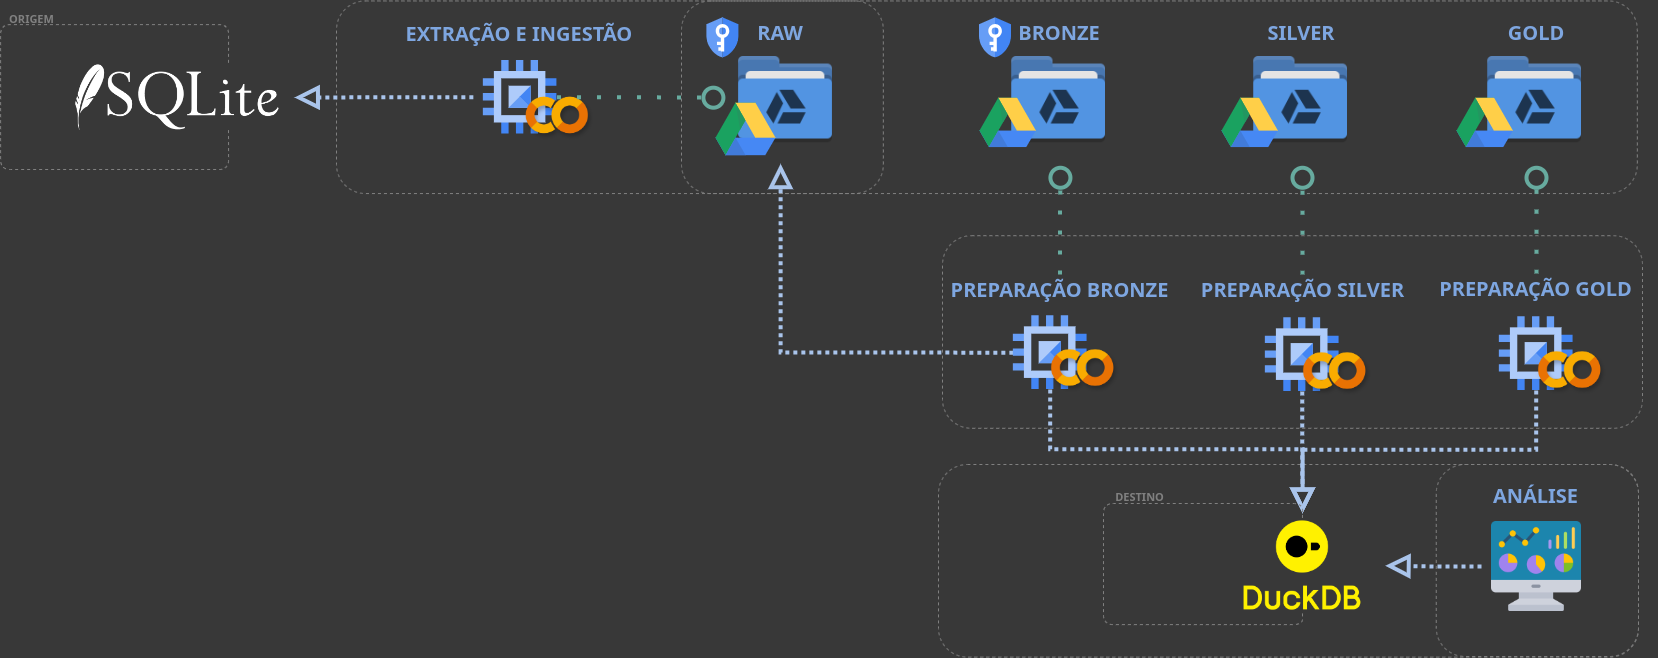

In [ ]:
img_path = "/content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/notebooks/assets/arquitetura-de-camadas.png"
Image(img_path, width=1500)

1. **Origem dos Dados (SQLite)**:

  - O ponto de origem dos dados é um banco de dados SQLite. Que representa o banco transacional (OLTP) que armazena os dados das trasações que ocorrem na plataforma Olist e de onde são extraídos.

2. **Extração e Ingestão**:

  - A extração dos dados do SQLite é realizada por um processo automatizado, scripts que escreveremos usando notebooks do Goole Colab.
  - O processo de ingestão transfere os dados para a camada RAW, armazenada no Google Drive.

3. **Camada RAW**:

  - Os dados extraídos do SQLite são armazenados em um repositório criado no Google Drive que representa a camada RAW, que serve como o ponto inicial de armazenamento dos dados brutos.

4. **Camada Bronze**:

  - Após o armazenamento na camada RAW, os dados passam por uma preparação inicial, onde são processados e movidos para a camada Bronze. Nesta etapa, os dados podem ser limpos e transformados, mas ainda permanecem próximos ao formato original.

5. **Camada Silver**:

  - Na camada Silver, os dados são processados e refinados, garantindo maior qualidade. Esta etapa pode incluir normalizações, validações e agregações mais complexas.
  - Os dados preparados nesta camada são mais estruturados e prontos para análises mais detalhadas.

6. **Camada Gold**

  - A camada Gold é a mais refinada e contém dados prontos para consumo por processos analíticos e de negócio. Os dados nesta camada são altamente agregados, transformados e otimizados para consultas rápidas e análises avançadas.

7. **Análise e Integração com DuckDB**:

  - Os dados das camadas de preparação são integrados ao DuckDB, um banco de dados OLAP embutido e otimizado para análises rápidas.
  - A camada de análise final é representada pela saída para um sistema de visualização, onde os insights podem ser explorados e apresentados.

8. **Armazenamento e Processamento no Google Drive e Google Colab:**

  - Por uma questão de acessibilidade e simplicidade:

    - Todas as camadas de refinamento (RAW, Bronze, Silver, Gold) utilizam o Google Drive para armazenar os dados em repositórios organizados.
    - O processamento em cada etapa é realizado usando códigos personalizados utilizando Google Colab.

Este diagrama reflete uma arquitetura moderna de pipelines de dados, usando camadas de refinamento para garantir a integridade e a qualidade dos dados ao longo do processo de transformação e análise.

## Setup do Sistema de Origem

In [ ]:
import os
from zipfile import ZipFile
from sqlalchemy import create_engine, text
import pandas as pd


In [ ]:
def olist_data_extractor(zip_file, data_dir, output_path):
    with ZipFile(os.path.join(data_dir, zip_file), "r") as data_raw:
        data_raw.extractall(path=os.path.join(data_dir, output_path))

In [ ]:
def olist_data_loader(datasets_path, database_conn):
  print("Carregando dados no banco de dados SQLite...")
  for csv_file in os.listdir(datasets_path):
    df_temp = pd.read_csv(os.path.join(datasets_path, csv_file))
    table_names = csv_file.strip(".csv")
    print(f"==> Importando {csv_file}...")
    df_temp.to_sql(table_names, con=database_conn, if_exists="replace", index=False)

In [ ]:
zip_file = "/content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data/RAW/olist_data.zip"
data_dir = "/content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data"
raw_output_path = "/content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data/RAW/olist-raw-path"

try:
    # Defina a conexão com o banco de dados de origem
    database_engine = create_engine("sqlite:////content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data/olist.db")

    # Extraia os dados
    olist_data_extractor(zip_file, data_dir, raw_output_path)

    # Carregue os dados no banco de dados de origem
    olist_data_loader(raw_output_path, database_engine)

except KeyError:
    print("A conexão com SQLite não está definida...")
except Exception as err:
    print(f"Ocorreu um erro inesperado: {err}")


Carregando dados no banco de dados SQLite...
==> Importando olist_customers_dataset.csv...
==> Importando olist_order_items_dataset.csv...
==> Importando olist_geolocation_dataset.csv...
==> Importando olist_order_payments_dataset.csv...
==> Importando olist_order_reviews_dataset.csv...
==> Importando olist_products_dataset.csv...
==> Importando product_category_name_translation.csv...
==> Importando olist_sellers_dataset.csv...
==> Importando olist_orders_dataset.csv...


### Conectando com o banco de origem

In [ ]:
database = create_engine('sqlite:////content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data/olist.db')

query = "SELECT name FROM sqlite_master WHERE type='table' ;"

with database.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(row)

('olist_customers_dataset',)
('olist_order_items_dataset',)
('olist_geolocation_dataset',)
('olist_order_payments_dataset',)
('olist_order_reviews_dataset',)
('olist_products_dataset',)
('product_category_name_translation',)
('olist_sellers_dataset',)
('olist_orders_dataset',)


In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:////content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data/olist.db

In [ ]:
%sql SELECT name FROM sqlite_master WHERE type='table' ;

 * sqlite:////content/drive/MyDrive/colab-notebooks/Projetos/oa-ac-sql-intro/data/olist.db
Done.


name
olist_customers_dataset
olist_order_items_dataset
olist_geolocation_dataset
olist_order_payments_dataset
olist_order_reviews_dataset
olist_products_dataset
product_category_name_translation
olist_sellers_dataset
olist_orders_dataset


### Verificando os dados no banco de origem

#### Primeria consultas SQL

Vamos realizar algumas consultas para verificarmos se todos os dados foram carregados corretamente:

In [ ]:
%sql SELECT * FROM olist_customers_dataset;

Output hidden; open in https://colab.research.google.com to view.

## Implementando a Ingestão para Camada RAW


A ingestão de dados para a camada raw (ou camada bruta) em um pipeline de dados envolve a captura e o armazenamento dos dados em seu formato original, sem qualquer transformação significativa. A camada raw serve como uma área de armazenamento temporária ou permanente, onde os dados são mantidos em seu estado bruto, garantindo que as informações originais estejam disponíveis para qualquer processamento ou análise posterior.